### Демонстрация основных методов Seaborn и Plotly

В начале как всегда настроим окружение: импортируем все необходимые библиотеки и немного настроим дефолтное отображение картинок.

In [1]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd
import seaborn as sns

После этого загрузим в dataframe данные о продажах и оценках видео-игр из [Kaggle Datasets](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings).

In [3]:
df=pd.read_csv('e:/Machine_Learning/datasets/Video_Games_Sales.csv')

In [4]:
df.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1           NaN        NaN         NaN       NaN    NaN  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4           NaN        NaN         NaN       NaN    NaN

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
print(df.shape)

(16719, 16)


Данные об оценках есть не для всех фильмов, поэтому оставим только те записи, в которых нет пропусков с помощью метода $dropna$.


In [7]:
df=df.dropna()
print(df.shape)

(6825, 16)


In [8]:
df.head()

Name Platform  Year_of_Release     Genre Publisher  \
0             Wii Sports      Wii           2006.0    Sports  Nintendo   
2         Mario Kart Wii      Wii           2008.0    Racing  Nintendo   
3      Wii Sports Resort      Wii           2009.0    Sports  Nintendo   
6  New Super Mario Bros.       DS           2006.0  Platform  Nintendo   
7               Wii Play      Wii           2006.0      Misc  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
6     11.28      9.14      6.50         2.88         29.80          89.0   
7     13.96      9.18      2.93         2.84         28.92          58.0   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
6          65.0        8.5       431.0  Nintendo      E  
7          41.0        6.6       129.0  Nintendo      E

Оставим только полезные колонки

In [9]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating']

In [10]:
df[useful_cols].head()

Name Platform  Year_of_Release     Genre  Global_Sales  \
0             Wii Sports      Wii           2006.0    Sports         82.53   
2         Mario Kart Wii      Wii           2008.0    Racing         35.52   
3      Wii Sports Resort      Wii           2009.0    Sports         32.77   
6  New Super Mario Bros.       DS           2006.0  Platform         29.80   
7               Wii Play      Wii           2006.0      Misc         28.92   

   Critic_Score  Critic_Count User_Score  User_Count Rating  
0          76.0          51.0          8       322.0      E  
2          82.0          73.0        8.3       709.0      E  
3          80.0          73.0          8       192.0      E  
6          89.0          65.0        8.5       431.0      E  
7          58.0          41.0        6.6       129.0      E

Cамый простой и зачастую удобный способ визуализировать данные из pandas dataframe — это воспользоваться функцией $plot$.
Для примера построим график продаж видео игр в различных странах в зависимости от года. Для начала отфильтруем только нужные нам столбцы, затем посчитаем суммарные продажи по годам и у получившегося $dataframe$ вызовем функцию $plot$ без параметров.

In [11]:
sales_df=df[[x for x in df.columns if 'Sales' in x]+['Year_of_Release']] # выбираем колонки с Sales + Year_of_Release
sales_df.head()

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Year_of_Release
0     41.36     28.96      3.77         8.45         82.53           2006.0
2     15.68     12.76      3.79         3.29         35.52           2008.0
3     15.61     10.93      3.28         2.95         32.77           2009.0
6     11.28      9.14      6.50         2.88         29.80           2006.0
7     13.96      9.18      2.93         2.84         28.92           2006.0

In [12]:
sales_df.groupby('Year_of_Release').sum()

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Year_of_Release                                                         
1985.0               0.00      0.03      0.00         0.01          0.03
1988.0               0.00      0.02      0.00         0.01          0.03
1992.0               0.02      0.00      0.00         0.00          0.03
1994.0               0.39      0.26      0.53         0.08          1.27
1996.0               7.91      6.88      4.06         1.24         20.10
1997.0              15.34      8.67      9.01         2.02         35.01
1998.0              18.13     12.13     10.81         2.14         43.18
1999.0              23.32     15.69      9.67         2.45         51.17
2000.0              39.34     25.20     11.27         5.49         81.24
2001.0             139.32     72.85     23.57        18.26        253.88
2002.0             163.76     84.03     18.61        22.30        288.84
2003.0             143.08     75.16     17.24        19.68        255.35
2004.0             173.88     83.01     22.74        42.14        321.78
2005.0             178.15     86.70     38.23        31.05        334.32
2006.0             225.69    104.53     40.43        45.90        416.72
2007.0             235.61    124.71     35.04        60.62        456.23
2008.0             256.25    137.31     37.42        57.89        489.12
2009.0             231.72    143.56     34.28        50.25        459.85
2010.0             213.24    130.13     25.19        44.24        412.96
2011.0             190.62    127.86     23.16        42.10        383.69
2012.0             133.94     99.08     27.36        31.57        291.93
2013.0             120.89     95.54     19.05        31.80        267.17
2014.0              79.38     76.42     14.02        22.58        192.43
2015.0              67.85     60.51     11.85        18.86        159.16
2016.0              34.52     41.03      4.34        11.59         91.56

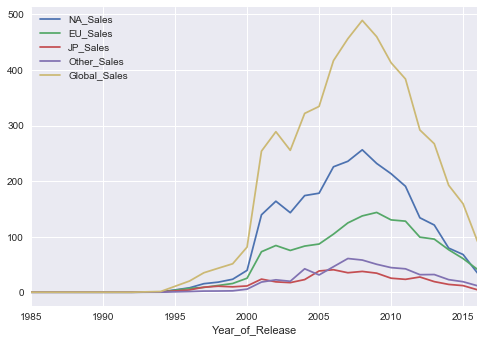

In [13]:
sales_df.groupby('Year_of_Release').sum().plot()

Реализация функции $plot$ в $pandas$ основана на библиотеке $matplotlib$.

C помощью параметра $kind$ можно изменить тип графика, например, на $bar$ $chart$. $Matplotlib$ позволяет очень гибко настраивать графики. На графике можно изменить почти все, что угодно, но потребуется порыться в документации и найти нужные параметры. Например, параметр $rot$ отвечает за угол наклона подписей к оси x.

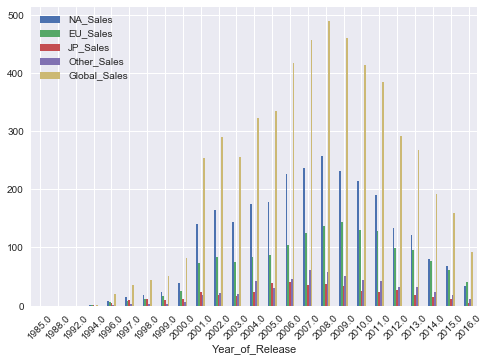

In [14]:
sales_df.groupby('Year_of_Release').sum().plot( kind='bar', rot=45)

### Seaborn

$Seaborn$ — это по сути более высокоуровневое API на базе библиотеки $matplotlib$ [(Seaborn: statistical data visualization)](http://seaborn.pydata.org/index.html). $Seaborn$ содержит более адекватные дефолтные настройки оформления графиков. Если просто добавить в код $import$ $seaborn$, то картинки станут гораздо симпатичнее. Также в библиотеке есть достаточно сложные типы визуализации, которые в $matplotlib$ потребовали бы большого количество кода.

Познакомимся с первым таким "сложным" типом графиков $pair$ $plot$ (scatter plot matrix). Эта визуализация поможет нам посмотреть на одной картинке, как связаны между собой различные признаки.


In [15]:
df['User_Score']=df['User_Score'].astype('float')

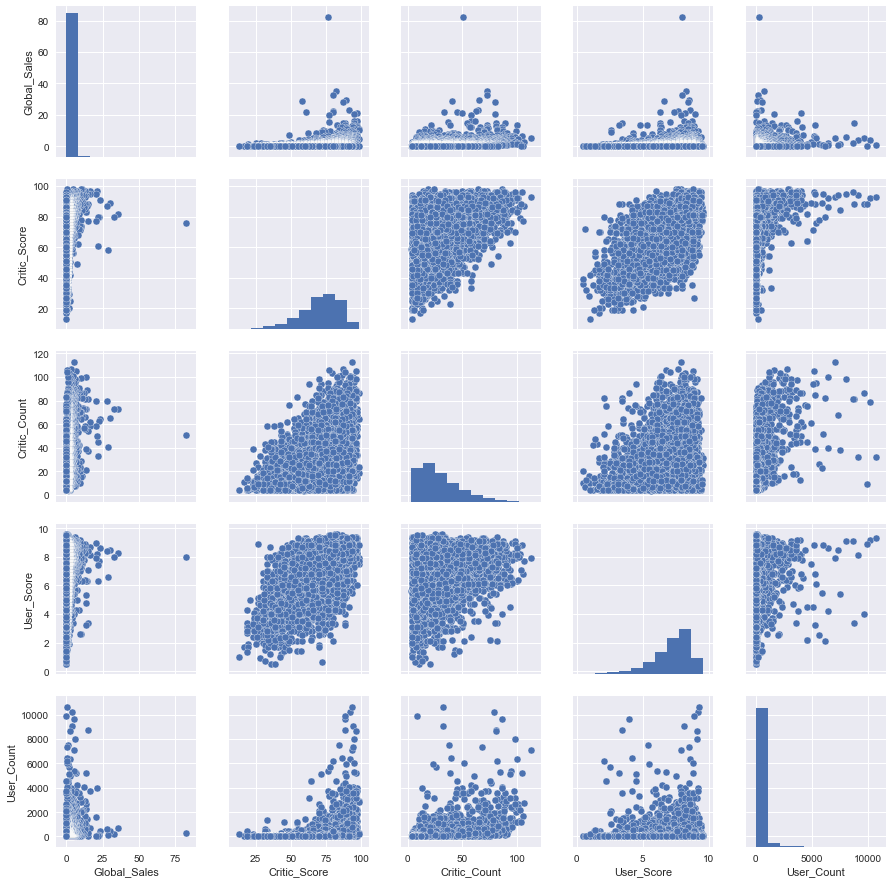

In [16]:
cols = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')

С помощью seaborn можно построить и распределение dist plot. Для примера посмотрим на распределение оценок критиков Critic_Score. По default'у на графике отображается гистограмма и kernel density estimation.

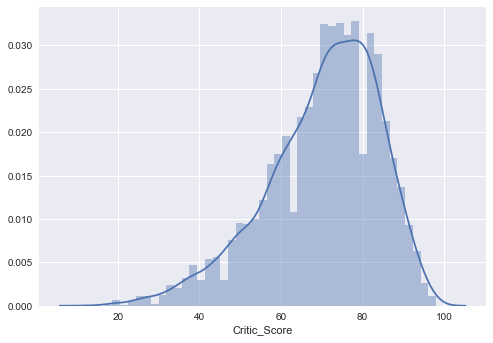

In [17]:
sns.distplot(df.Critic_Score)

Для того, чтобы подробнее посмотреть на взаимосвязь двух численных признаков, есть еще и $joint$ $plot$ — это гибрид $scatter$ $plot$ и $histogram$. Посмотрим на то, как связаны между собой оценка критиков $Critic$_$Score$ и оценка пользователя $User$_$Score$.


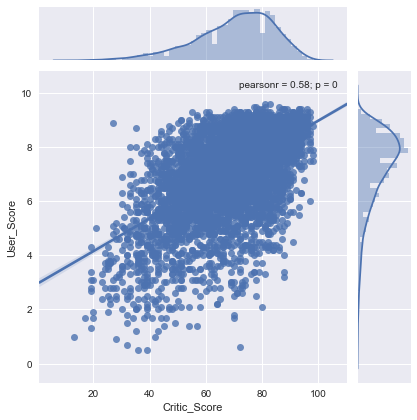

In [18]:
sns.jointplot(x='Critic_Score', y='User_Score', data=df, kind='reg')

Еще один полезный тип графиков — это **box plot** [(wikipedia)](https://en.wikipedia.org/wiki/Box_plot). Давайте сравним оценки игр от критиков для топ-5 крупнейших игровых платформ.

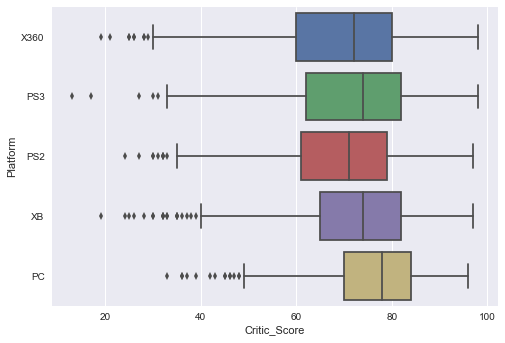

In [19]:
top_platforms=df.Platform.value_counts().sort_values(ascending=False).head(5).index.values
sns.boxplot(y="Platform", x="Critic_Score", data=df[df.Platform.isin(top_platforms)], orient="h")

**Box plot** состоит из *коробки* (поэтому он и называется `box plot`), *усиков* и *точек*. Коробка показывает ***интерквартильный размах распределения***, то есть соответственно **25% (Q1)** и **75% (Q3)** перцентили. Черта внутри коробки обозначает ***медиану*** распределения.

Усы отображают весь разброс точек кроме выбросов, то есть минимальные и максимальные значения, которые попадают в промежуток $$(Q1 - 1.5*IQR, Q3 + 1.5*IQR)$$, где $IQR = Q3 - Q1$ — интерквартильный размах. 

***Точками*** на графике обозначаются выбросы (***outliers***) — те значения, которые не вписываются в промежуток значений, заданный усами графика.

Картинка из [wikipedia](https://en.wikipedia.org/wiki/Box_plot)

![Картинка из wiki](https://upload.wikimedia.org/wikipedia/commons/1/1a/Boxplot_vs_PDF.svg "Картинка из wiki")

И еще один тип графиков — это heat map. Heat map позволяет посмотреть на распределение какого-то численного признака по двум категориальным. Визуализируем суммарные продажи игр по жанрам и игровым платформам.

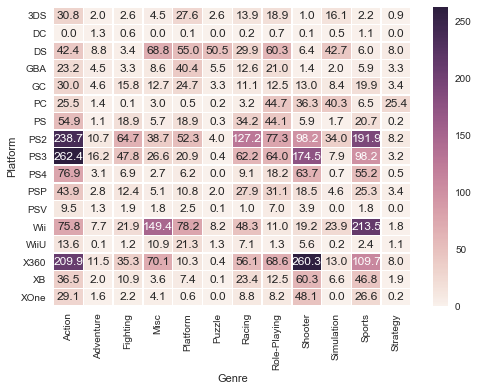

In [20]:
platform_gentre_sales=df.pivot_table(
    index='Platform',
    columns='Genre',
    values='Global_Sales',
    aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_gentre_sales, annot=True, fmt=".1f", linewidths=.5)

### **Plotly**

Это были визуализации на базе библиотеки `matplotlib`. Однако это не единственная опция для построения графиков на языке **python**.  **Plotly** — это *open-source* библиотека, которая позволяет строить интерактивные графики в *jupyter.notebook'e* без необходимости зарываться в *javascript код* [Plotly Python Library](https://plot.ly/python/).

Прелесть интерактивных графиков заключается в том, что можно посмотреть точное численное значение при наведении мыши, скрыть неинтересные ряды в визуализации, приблизить определенный участок графика и т.д.

Перед началом работы импортируем все необходимые модули и инициализируем `plotly` с помощью команды `init_notebook_mode`.

In [21]:
#pip install plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)


In [22]:
# посчитаем число вышедших игр и проданных копий по годам
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count()
)
years_df.columns = ['Global_Sales', 'Number_of_Games']
years_df.head()

Global_Sales  Number_of_Games
Year_of_Release                               
1985.0                   0.03                1
1988.0                   0.03                1
1992.0                   0.03                1
1994.0                   1.27                1
1996.0                  20.10                7

In [23]:
# создаем линию для числа проданных копий
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.Global_Sales,
    name='Global Sales'
)

# создаем линию для числа вышедших игр 
trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.Number_of_Games,
    name='Number of games released'
)

# определяем массив данных и задаем title графика в layout
data = [trace0, trace1]
layout = {'title': 'Statistics of video games'}

# cоздаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

Можно сразу сохранить график в виде html-файла.

In [24]:
plotly.offline.plot(fig, filename='years_stats.html', show_link=False)

'file://C:\\Users\\Олена\\ipython_lessons\\years_stats.html'

Посмотрим также на рыночную долю игровых платформ, рассчитанную по количеству выпущенных игр и по суммарной выручке. Для этого построим `bar chart`.


In [25]:
# считаем число проданных и вышедших игр по платформам
platforms_df=df.groupby('Platform')[['Global_Sales']].sum().join(df.groupby('Platform')[['Name']].count())
platforms_df.columns=['Global_Sales','Number_of_Games']
platforms_df.sort_values('Global_Sales', ascending=False, inplace=True)

platforms_df.head()

Global_Sales  Number_of_Games
Platform                               
PS2             945.97             1140
X360            853.30              858
PS3             784.30              769
Wii             658.98              479
DS              382.33              464

In [26]:
# создаем traces для визуализации
trace0=go.Bar(x=platforms_df.index,
             y=platforms_df.Global_Sales,
             name='Global Sales')
trace1=go.Bar(x=platforms_df.index,
             y=platforms_df.Number_of_Games,
             name='Number of Games released')
# создаем массив с данными и задаем title для графика и оси x в layout
data=[trace0,trace1]
layout = {'title': 'Share of platforms', 'xaxis': {'title': 'platform'}}
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)


В `plotly` можно построить и `box plot`. Рассмотрим распределения оценок критиков в зависимости от жанра игры.

In [27]:
# создаем Box trace для каждого жанра из наших данных
data=[]
for genre in df.Genre.unique():
    data.append(
    go.Box(y=df[df.Genre==genre].Critic_Score,name=genre)
    )
#визуализируем
iplot(data,show_link=False)
    

## Пример визуального анализа данных


Считываем в `DataFrame` [данные](https://bigml.com/user/francisco/gallery/dataset/5163ad540c0b5e5b22000383) по оттоку клиентов телеком-оператора.

In [28]:
df=pd.read_csv('e:/Machine_Learning/datasets/telecom.csv')

In [29]:
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...    total eve calls  total eve charge  \
0             45.07  ...                 99             16.78   
1             27.47  ...                103             16.62   
2             41.38  ...                110             10.30   
3             50.90  ...                 88              5.26   
4             28.34  ...                122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [30]:
df.shape

(3333, 21)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

<div class="spoiler"><b class="spoiler_title">Описание признаков</b><div class="spoiler_text"><table>
<thead>
<tr>
<th>Название</th>
<th>Описание</th>
<th>Тип</th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>State</strong></td>
<td>Буквенный код штата</td>
<td>номинальный</td>
</tr>
<tr>
<td><strong>Account length</strong></td>
<td>Как долго клиент обслуживается компанией</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Area code</strong></td>
<td>Префикс номера телефона</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>International plan</strong></td>
<td>Международный роуминг (подключен/не подключен)</td>
<td>бинарный</td>
</tr>
<tr>
<td><strong>Voice mail plan</strong></td>
<td>Голосовая почта (подключена/не подключена)</td>
<td>бинарный</td>
</tr>
<tr>
<td><strong>Number vmail messages</strong></td>
<td>Количество голосовых сообщений</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total day minutes</strong></td>
<td>Общая длительность разговоров днем</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total day calls</strong></td>
<td>Общее количество звонков днем</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total day charge</strong></td>
<td>Общая сумма оплаты за услуги днем</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total eve minutes</strong></td>
<td>Общая длительность разговоров вечером</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total eve calls</strong></td>
<td>Общее количество звонков вечером</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total eve charge</strong></td>
<td>Общая сумма оплаты за услуги вечером</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total night minutes</strong></td>
<td>Общая длительность разговоров ночью</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total night calls</strong></td>
<td>Общее количество звонков ночью</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total night charge</strong></td>
<td>Общая сумма оплаты за услуги ночью</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total intl minutes</strong></td>
<td>Общая длительность международных разговоров</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total intl calls</strong></td>
<td>Общее количество международных разговоров</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Total intl charge</strong></td>
<td>Общая сумма оплаты за международные разговоры</td>
<td>количественный</td>
</tr>
<tr>
<td><strong>Customer service calls</strong></td>
<td>Число обращений в сервисный центр</td>
<td>количественный</td>
</tr>
</tbody>
</table><br/>


Целевая переменная: **churn** – Признак оттока, бинарный (1 – потеря клиента, то есть отток). Потом мы будем строить модели, прогнозирующие этот признак по остальным, поэтому мы и назвали его *целевым*.

Посмотрим на распределение целевого класса – оттока клиентов.


In [32]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

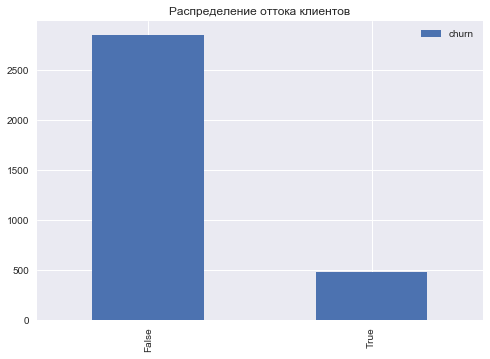

In [33]:
df['churn'].value_counts().plot(kind='bar', label='churn')
plt.legend()
plt.title('Распределение оттока клиентов')

Выделим следующие группы признаков (среди всех кроме *churn* ):

- бинарные: international plan, voice mail plan
- категориальные: state
- порядковые: area code
- количественные: все остальные

Посмотрим на корреляции количественных признаков. Бинарніе признакиЮ категориальные и area code выбросим. По раскрашенной матрице корреляций видно, что такие признаки как *total day charge* считаются по проговоренным минутам (*total day minutes*). То есть 4 признака можно выкинуть, они не несут полезной информации.

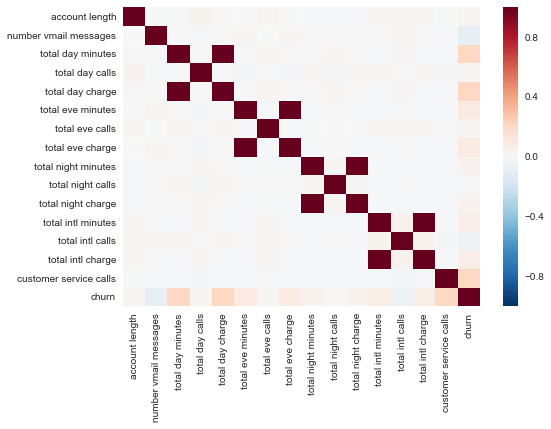

In [34]:
corr_matrix=df.drop(['state','international plan','voice mail plan','area code'],axis=1).corr()
sns.heatmap(corr_matrix);

Теперь посмотрим на распределения всех интересующих нас количественных признаков. На бинарные/категориальные/порядковые признакие будем смотреть отдельно.

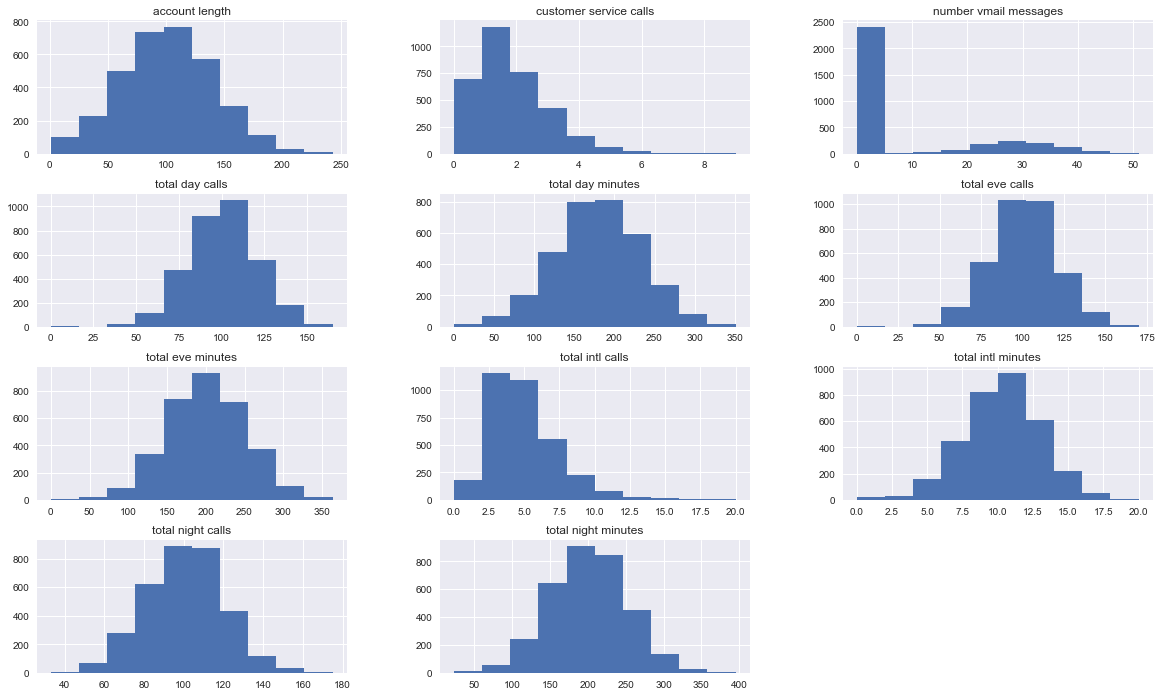

In [35]:
features = list(set(df.columns) - set(['state', 'international plan', 'voice mail plan',  'area code',
                                      'total day charge',   'total eve charge',   'total night charge',
                                        'total intl charge', 'churn']))

df[features].hist(figsize=(20,12));

Видим, что большинство признаков распределены нормально. Исключения – число звонков в сервисный центр (`customer service calls`) (тут больше подходит пуассоновское распределение) и число голосовых сообщений (`number vmail messages`, пик в нуле, т.е. это те, у кого голосовая почта не подключена). Также смещено распределение числа международных звонков (`total intl calls`).

Еще полезно строить вот такие картинки, где на главной диагонали рисуются распредления признаков, а вне главной диагонали – диаграммы рассеяния для пар признаков. Бывает, что это приводит к каким-то выводам, но в данном случае все примерно понятно, без сюрпризов.

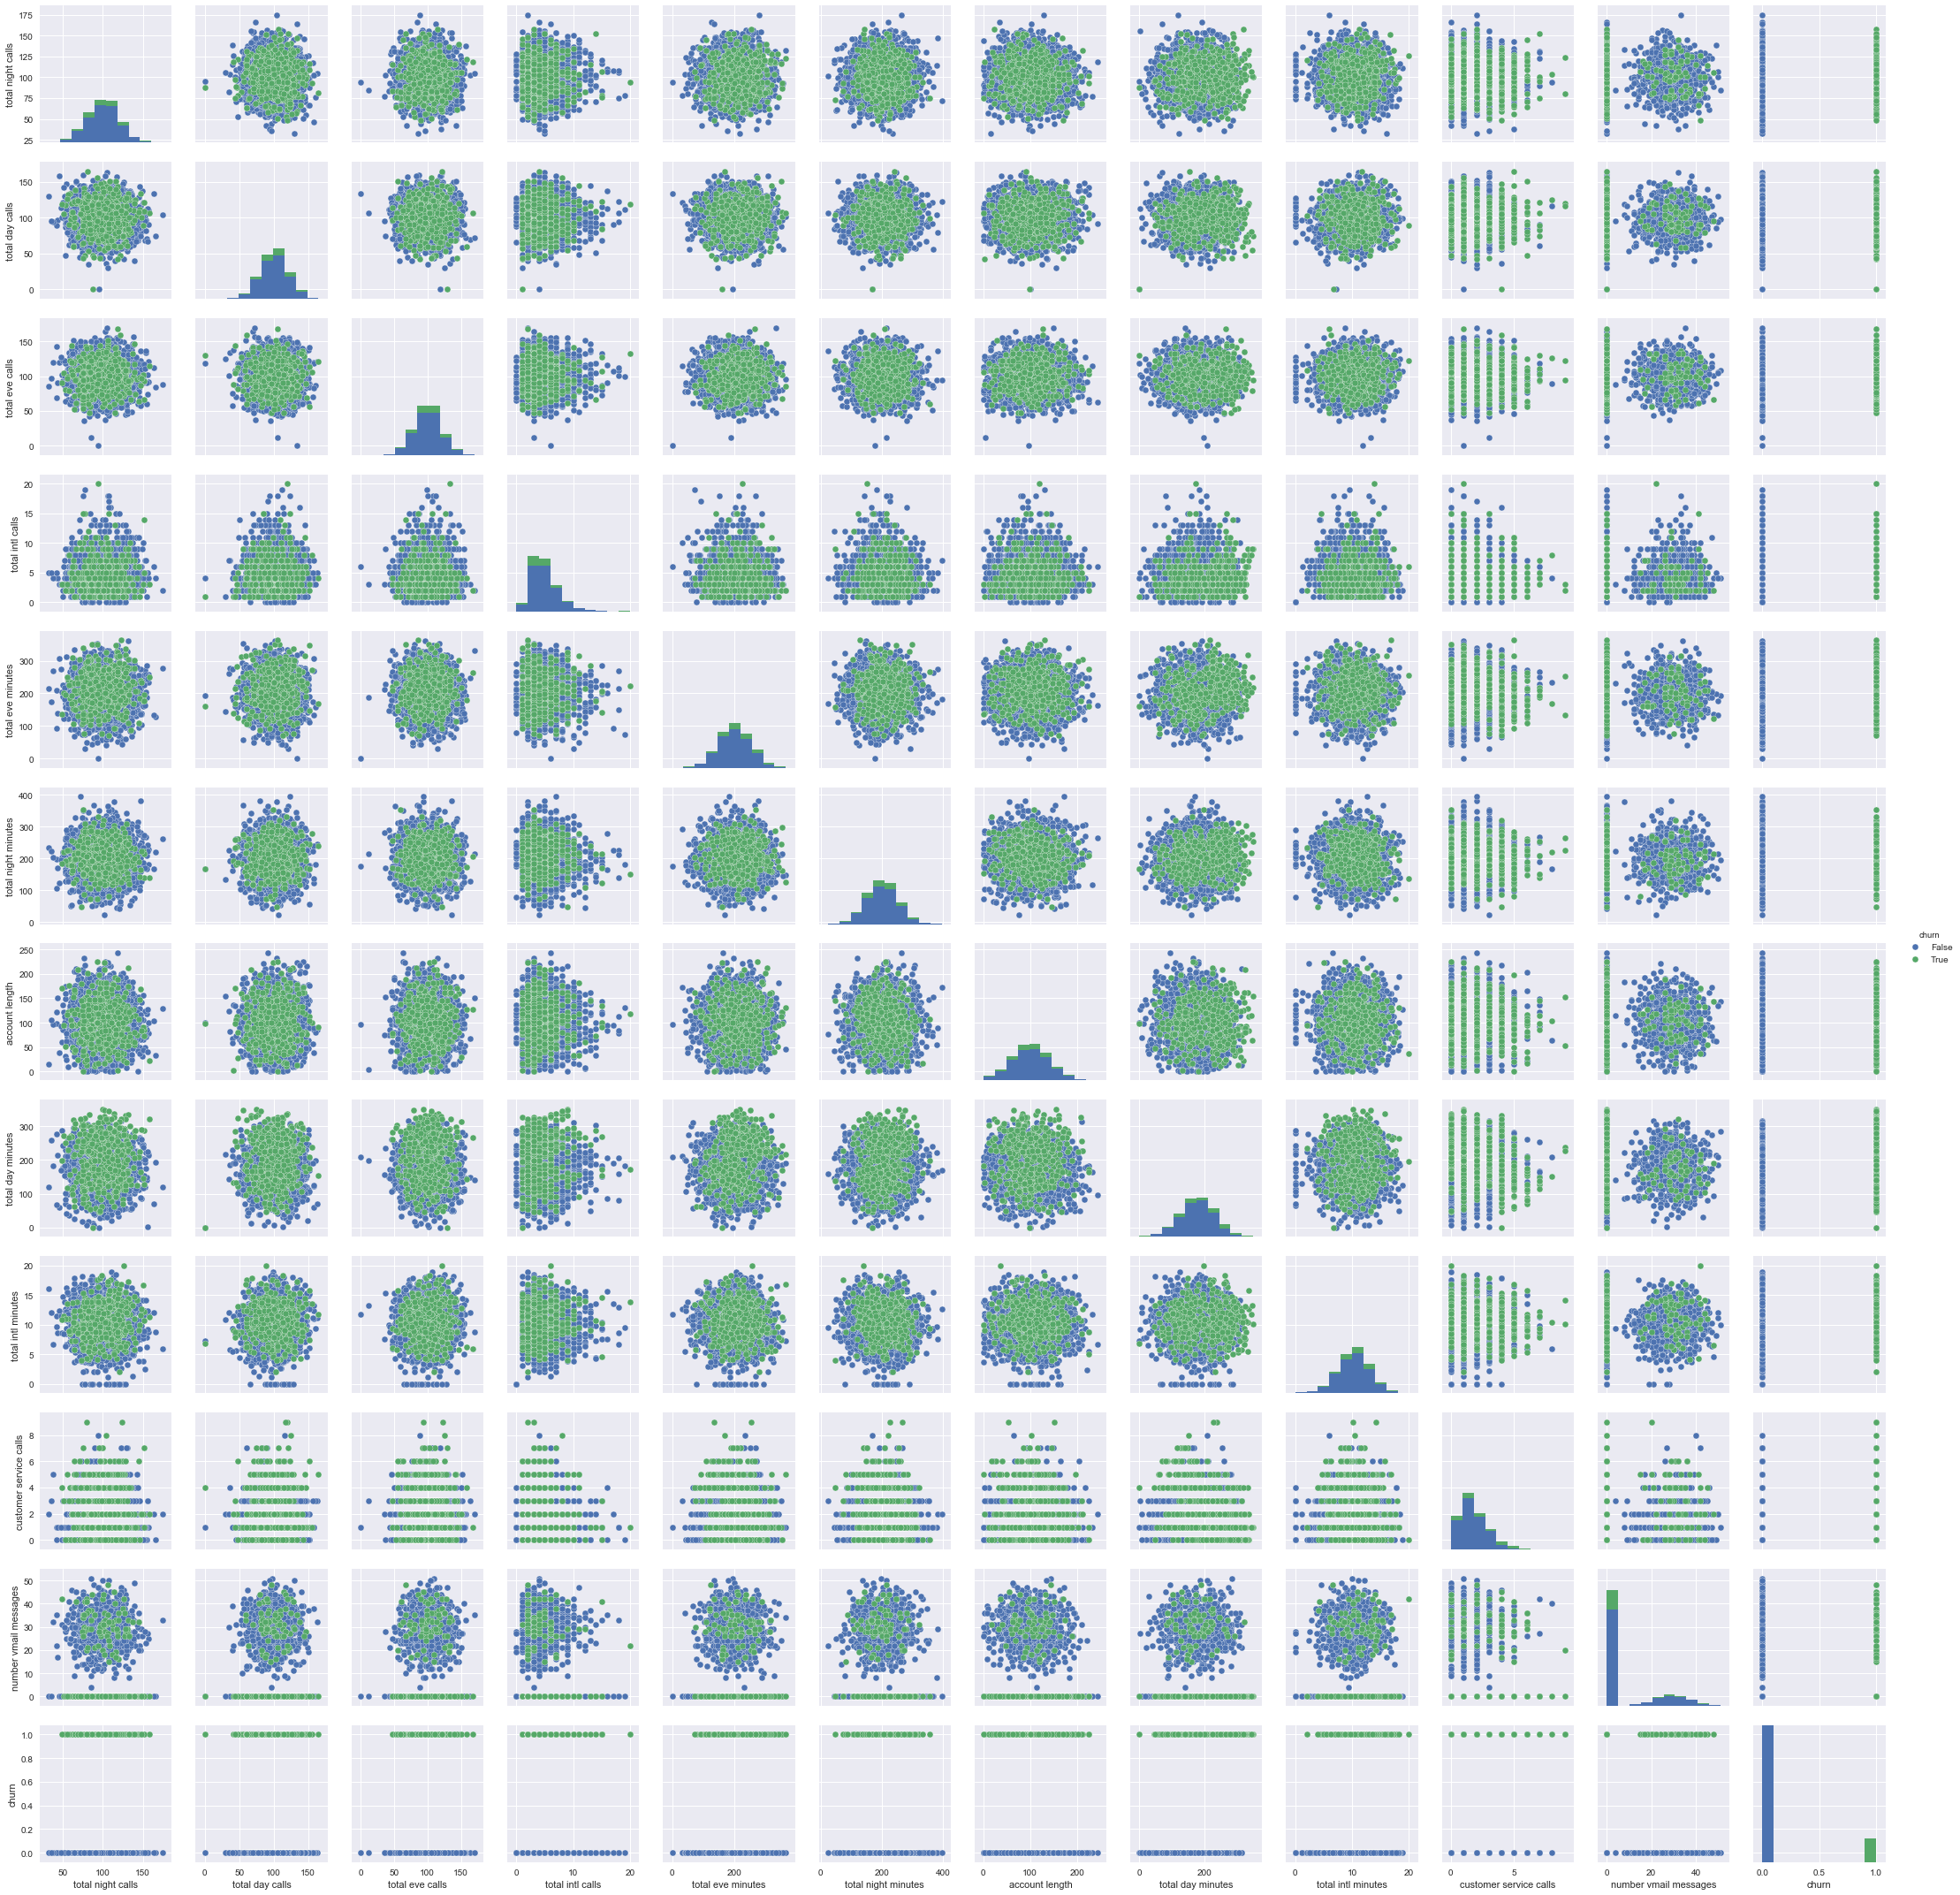

In [36]:
sns.pairplot(df[features + ['churn']], hue='churn');

### Дальше посмотрим, как признаки связаны с целевым – с оттоком.

Построим `boxplot`-ы, описывающее статистики распределения количественных признаков в двух группах: среди лояльных и ушедших клиентов.


In [ ]:
#Вот здесь у меня ошибка. Скорее всего в рзбиениях на экраны с графиками. Но я устала ее (ошибку) искать
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

for idx, feat in  enumerate(features):
    sns.boxplot(x='churn', y=feat, data=df, ax=axes[idx % 3, idx % 4])
    axes[idx // 3, idx % 4].legend()
    axes[idx // 4, idx % 4].set_xlabel('churn')
    axes[idx // 3, idx % 4].set_ylabel(feat);
   

На глаз наибольшее отличие мы видим для признаков `total day minutes`, `customer service calls` и `number vmail messages`. Впоследствии мы научимся определять важность признаков в задаче классификации с помощью случайного леса (или градиентного бустинга), и окажется, что первые два – действительно очень важные признаки для прогнозирования оттока.

Посмотрим отдельно на картинки с распределением кол-ва проговоренных днем минут среди лояльных/ушедших. Слева — знакомые нам боксплоты, справа – сглаженные гистограммы распределения числового признака в двух группах (скорее просто красивая картинка, все и так понятно по боксплоту).

Интересное *наблюдение*: в среднем ушедшие клиенты больше пользуются связью. Возможно, они недовольны тарифами, и одной из мер борьбы с оттоком будет понижение тарифных ставок (стоимости мобильной связи). Но это уже компании надо будет проводить дополнительный экономический анализ, действительно ли такие меры будут оправданы.

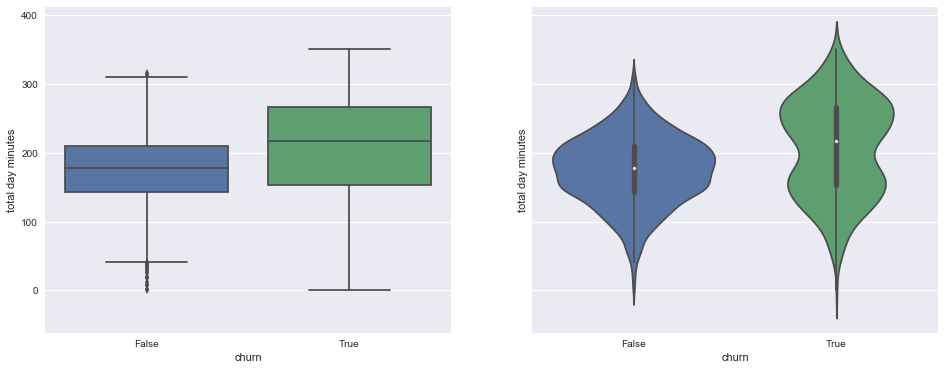

In [39]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

sns.boxplot(x='churn', y='total day minutes', data=df, ax=axes[0]);
sns.violinplot(x='churn', y='total day minutes', data=df, ax=axes[1]);

Теперь изобразим распределение числа обращений в сервисный центр. Тут уникальных значений признака не много (признак можно считать как количественным целочисленным, так и порядковым), и наглядней изобразить распределение с помощью `countplot`. Наблюдение: доля оттока сильно возрастает начиная с 4 звонков в сервисный центр.


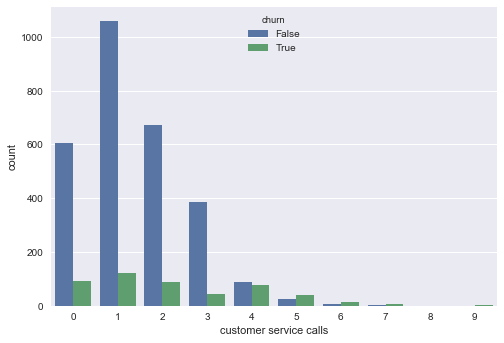

In [40]:
sns.countplot(x='customer service calls', hue='churn', data=df);

Теперь посмотрим на связь бинарных признаков `international plan` и `voice mail plan` с оттоком. Наблюдение: когда роуминг подключен, доля оттока намного выше, т.е. наличие международного роуминга – сильный признак. Про голосовую почту такого нельзя сказать.

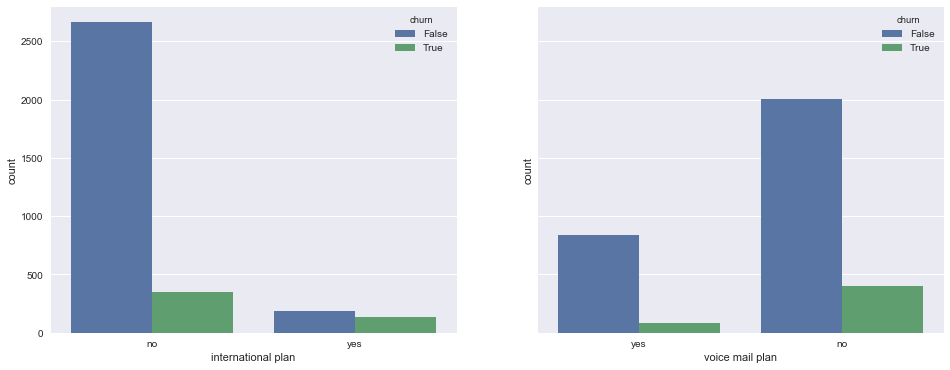

In [41]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

sns.countplot(x='international plan', hue='churn', data=df, ax=axes[0]);
sns.countplot(x='voice mail plan', hue='churn', data=df, ax=axes[1]);


Наконец, посмотрим, как с оттоком связан категориальный признак `state`. С ним уже не так приятно работать, поскольку число уникальных штатов довольно велико – 51. Можно в начале построить сводную табличку или посчитать процент оттока для каждого штата. Но данных по каждом штату по отдельности маловато (ушедших клиентов всего от 3 до 17 в каждом штате), поэтому, возможно, признак `state` впоследствии не стоит добавлять в модели классификации из-за риска переобучения (но мы это будем проверять на кросс-валидации, stay tuned!).

Доли оттока для каждого штата:

In [42]:
df.groupby(['state'])['churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

state        NJ        CA    TX        MD        SC        MI        MS  \
mean   0.264706  0.264706  0.25  0.242857  0.233333  0.219178  0.215385   

state        NV        WA        ME    ...           RI        WI        IL  \
mean   0.212121  0.212121  0.209677    ...     0.092308  0.089744  0.086207   

state        NE        LA        IA        VA      AZ        AK        HI  
mean   0.081967  0.078431  0.068182  0.064935  0.0625  0.057692  0.056604  

[1 rows x 51 columns]

Видно, что в Нью-Джерси и Калифорнии доля оттока выше 25%, а на Гавайях и в Аляске меньше 5%. Но эти выводы построены на слишком скромной статистике и возможно, это просто особенности имеющихся данных (тут можно и гипотезы попроверять про корреляции Мэтьюса и Крамера, но это уже за рамками данной статьи).

## Подглядывание в n-мерное пространство с t-SNE

Построим `t-SNE` представление все тех же данных по оттоку. Название метода сложное – `t-distributed Stohastic Neighbor Embedding`, математика тоже крутая (для желающих – [вот](http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) оригинальная статья Д. Хинтона и его аспиранта в JMLR), но основная идея проста, как дверь: найдем такое отображение из многомерного признакового пространства на плоскость (или в $3D$, но почти всегда выбирают $2D$), чтоб точки, которые были далеко друг от друга, на плоскости тоже оказались удаленными, а близкие точки – также отобразились на близкие. То есть `neighbor embedding` – это своего рода поиск нового представления данных, при котором сохраняется соседство.

Немного деталей: выкинем штаты и признак оттока, бинарные *Yes/No*-признаки переведем в числа (`pd.factorize`). Также нужно масштабировать выборку – из каждого признака вычесть его среднее и поделить на стандартное отклонение, это делает `StandardScaler`.

In [43]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


In [44]:
# преобразуем все признаки в числовые, выкинув штаты
X = df.drop(['churn', 'state','phone number'], axis=1)
X.head()

account length  area code international plan voice mail plan  \
0             128        415                 no             yes   
1             107        415                 no             yes   
2             137        415                 no              no   
3              84        408                yes              no   
4              75        415                yes              no   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  
0                       1  
1                       1  
2                       0  
3                       2  
4                       3

In [45]:
d = {'no': False, 'yes': True}
X['international plan'] = X['international plan'].map(d)
X['voice mail plan']=X['voice mail plan'].map(d)
X.head()

account length  area code  international plan  voice mail plan  \
0             128        415               False             True   
1             107        415               False             True   
2             137        415               False            False   
3              84        408                True            False   
4              75        415                True            False   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  
0                       1  
1                       1  
2                       0  
3                       2  
4                       3

In [46]:
X['international plan'] = pd.factorize(X['international plan'], sort = True)[0]
X['voice mail plan'] = pd.factorize(X['voice mail plan'], sort = True)[0]

In [47]:
X.head()

account length  area code  international plan  voice mail plan  \
0             128        415                   0                1   
1             107        415                   0                1   
2             137        415                   0                0   
3              84        408                   1                0   
4              75        415                   1                0   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  
0                       1  
1                       1  
2                       0  
3                       2  
4                       3

In [48]:
X.describe()

account length    area code  international plan  voice mail plan  \
count     3333.000000  3333.000000         3333.000000      3333.000000   
mean       101.064806   437.182418            0.096910         0.276628   
std         39.822106    42.371290            0.295879         0.447398   
min          1.000000   408.000000            0.000000         0.000000   
25%         74.000000   408.000000            0.000000         0.000000   
50%        101.000000   415.000000            0.000000         0.000000   
75%        127.000000   510.000000            0.000000         1.000000   
max        243.000000   510.000000            1.000000         1.000000   

       number vmail messages  total day minutes  total day calls  \
count            3333.000000        3333.000000      3333.000000   
mean                8.099010         179.775098       100.435644   
std                13.688365          54.467389        20.069084   
min                 0.000000           0.000000         0.000000   
25%                 0.000000         143.700000        87.000000   
50%                 0.000000         179.400000       101.000000   
75%                20.000000         216.400000       114.000000   
max                51.000000         350.800000       165.000000   

       total day charge  total eve minutes  total eve calls  total eve charge  \
count       3333.000000        3333.000000      3333.000000       3333.000000   
mean          30.562307         200.980348       100.114311         17.083540   
std            9.259435          50.713844        19.922625          4.310668   
min            0.000000           0.000000         0.000000          0.000000   
25%           24.430000         166.600000        87.000000         14.160000   
50%           30.500000         201.400000       100.000000         17.120000   
75%           36.790000         235.300000       114.000000         20.000000   
max           59.640000         363.700000       170.000000         30.910000   

       total night minutes  total night calls  total night charge  \
count          3333.000000        3333.000000         3333.000000   
mean            200.872037         100.107711            9.039325   
std              50.573847          19.568609            2.275873   
min              23.200000          33.000000            1.040000   
25%             167.000000          87.000000            7.520000   
50%             201.200000         100.000000            9.050000   
75%             235.300000         113.000000           10.590000   
max             395.000000         175.000000           17.770000   

       total intl minutes  total intl calls  total intl charge  \
count         3333.000000       3333.000000        3333.000000   
mean            10.237294          4.479448           2.764581   
std              2.791840          2.461214           0.753773   
min              0.000000          0.000000           0.000000   
25%              8.500000          3.000000           2.300000   
50%             10.300000          4.000000           2.780000   
75%             12.100000          6.000000           3.270000   
max             20.000000         20.000000           5.400000   

       customer service calls  
count             3333.000000  
mean                 1.562856  
std                  1.315491  
min                  0.000000  
25%                  1.000000  
50%                  1.000000  
75%                  2.000000  
max                  9.000000

In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
account length            3333 non-null int64
area code                 3333 non-null int64
international plan        3333 non-null int64
voice mail plan           3333 non-null int64
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64
customer service calls    3333 non-null int64
dtypes: float64(8), int64(10)
memory usage: 468.8

In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

Wall time: 1min 8s


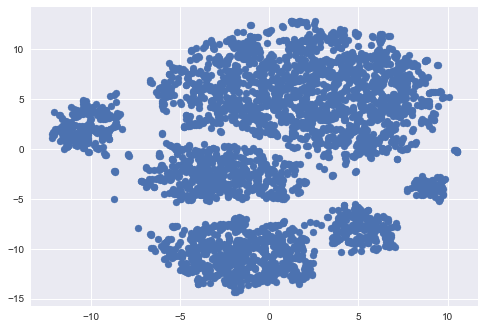

In [52]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

Раскрасим полученное t-SNE представление данных по оттоку (зеленые – лояльные, красные – ушедшие клиенты).

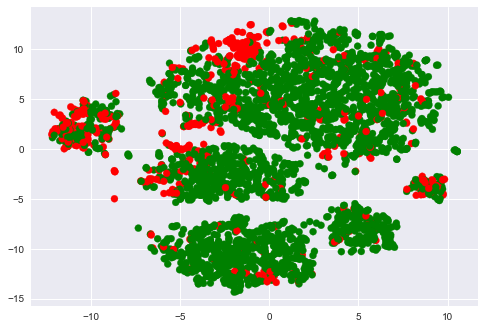

In [53]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['churn'].map({0: 'green', 1: 'red'}));

Чтоб лучше понять картинку, можно также раскрасить ее по остальным бинарным признакам – по роумингу и голосовой почте. Зеленые участки соответствуют объектам, обладающим этим бинарным признаком.

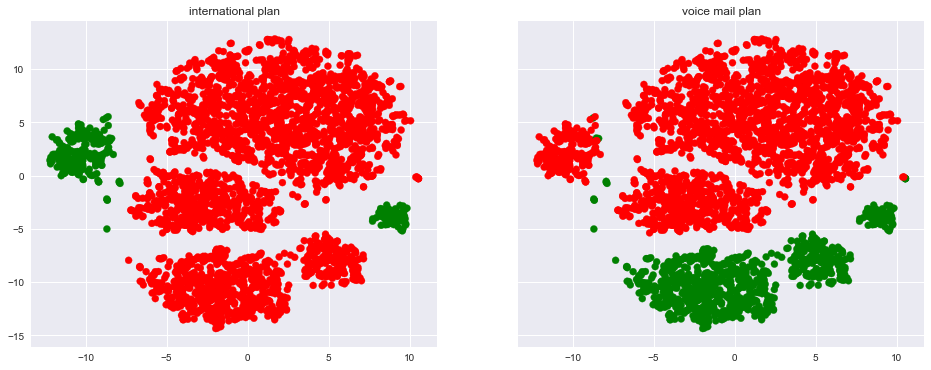

In [54]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

axes[0].scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['international plan'].map({'yes': 'green', 'no': 'red'}));
axes[1].scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['voice mail plan'].map({'yes': 'green', 'no': 'red'}));
axes[0].set_title('international plan');
axes[1].set_title('voice mail plan');

Теперь понятно, что, например, много ушедших клиентов кучкуется в левом кластере людей с поключенным роумингом, но без голосовой почты.

Напоследок отметим минусы **t-SNE** (да, по нему тоже лучше писать отдельную статью):

большая вычислительная сложность. Вот [эта](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) реализация `sklearn` скорее всего не поможет в Вашей реальной задаче, на больших выборках стоит посмотреть в сторону [Multicore-TSNE](https://github.com/DmitryUlyanov/Multicore-TSNE);
картинка может сильно поменяться при изменении random seed, это усложняет интерпретацию. Вот хороший [тьюториал](http://distill.pub/2016/misread-tsne/) по t-SNE. Но в целом по таким картинкам не стоит делать далеко идущих выводов – не стоит гадать по кофейной гуще. Иногда что-то бросается в глаза и подтверждается при изучении, но это не часто происходит.
